In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path = '/content/drive/MyDrive/Project DS/Data Analytics Real World Project -Python/2-Time Series Data Analysis/individual_stocks_5yr'

company_list = ['AAPL_data.csv', 'GOOG_data.csv', 'MSFT_data.csv', 'AMZN_data.csv']
all_data=pd.DataFrame()
for file in company_list:
    current_df = pd.read_csv(path+'/'+file)
    all_data = pd.concat([all_data,current_df])
all_data.shape

(4752, 7)

In [4]:
all_data.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL


In [5]:
all_data.dtypes

date       object
open      float64
high      float64
low       float64
close     float64
volume      int64
Name       object
dtype: object

In [6]:
all_data['date'] = pd.to_datetime(all_data['date'])

In [7]:
all_data.dtypes

date      datetime64[ns]
open             float64
high             float64
low              float64
close            float64
volume             int64
Name              object
dtype: object

In [8]:
tech_list = all_data['Name'].unique()

In [9]:
tech_list

array(['AAPL', 'GOOG', 'MSFT', 'AMZN'], dtype=object)

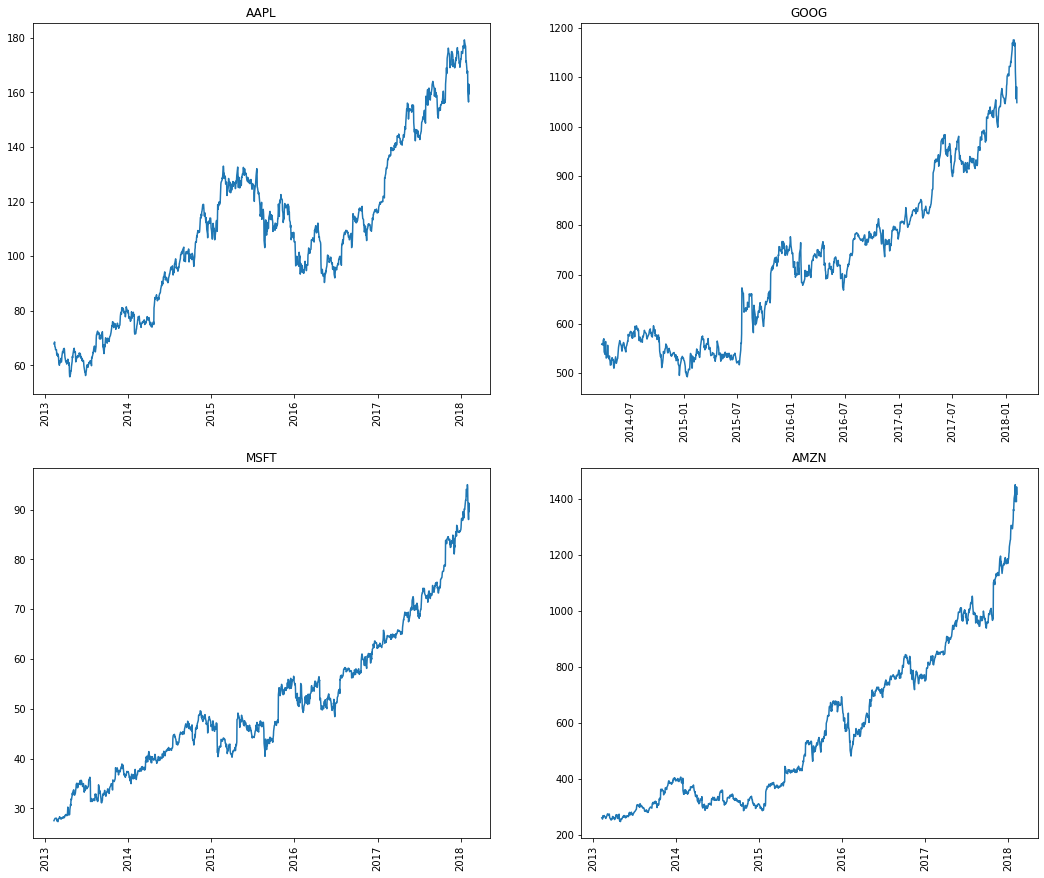

In [10]:
plt.figure(figsize=(18,15))

for i, company in enumerate(tech_list,1):
    plt.subplot(2,2,i)
    df = all_data[all_data['Name']==company]
    plt.plot(df['date'],df['close'])
    plt.xticks(rotation='vertical')
    plt.title(company)

In [11]:
import plotly.express as px

In [12]:
for company in tech_list:
    df = all_data[all_data['Name']==company]
    fig = px.line(df, x = 'date', y = 'volume', title = company)
    fig.show()

In [13]:
#use Apple dataset

d_apl = pd.read_csv('/content/drive/MyDrive/Project DS/Data Analytics Real World Project -Python/2-Time Series Data Analysis/individual_stocks_5yr/AAPL_data.csv')
d_apl.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL


In [14]:
d_apl['Daily_Price_change'] = d_apl['close'] - d_apl['open']
d_apl

,date,open,high,low,close,volume,Name,Daily_Price_change
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,0.1400
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,0.4900
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,-1.6586
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,-0.0286
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL,0.2957
...,...,...,...,...,...,...,...,...
1254,2018-02-01,167.1650,168.6200,166.7600,167.7800,47230787,AAPL,0.6150
1255,2018-02-02,166.0000,166.8000,160.1000,160.5000,86593825,AAPL,-5.5000
1256,2018-02-05,159.1000,163.8800,156.0000,156.4900,72738522,AAPL,-2.6100
1257,2018-02-06,154.8300,163.7200,154.0000,163.0300,68243838,AAPL,8.2000


In [15]:
d_apl['1day % return'] = (d_apl['Daily_Price_change'] / d_apl['close'])*100
d_apl.head()

,date,open,high,low,close,volume,Name,Daily_Price_change,1day % return
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,0.1400,0.206325
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,0.4900,0.714688
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,-1.6586,-2.481344
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,-0.0286,-0.042869
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL,0.2957,0.443624


In [16]:
fig = px.line(d_apl, x = 'date', y = '1day % return', title = company)
fig.show() 

In [17]:
d = d_apl.copy()

In [18]:
d.dtypes

date                   object
open                  float64
high                  float64
low                   float64
close                 float64
volume                  int64
Name                   object
Daily_Price_change    float64
1day % return         float64
dtype: object

In [19]:
d['date'] = pd.to_datetime(d['date'])

In [20]:
d.set_index('date', inplace=True)

In [21]:
d.head()

,open,high,low,close,volume,Name,Daily_Price_change,1day % return
date,,,,,,,,
2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,0.1400,0.206325
2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,0.4900,0.714688
2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,-1.6586,-2.481344
2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,-0.0286,-0.042869
2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL,0.2957,0.443624


In [22]:
d['2013-02-08':'2013-02-14']

,open,high,low,close,volume,Name,Daily_Price_change,1day % return
date,,,,,,,,
2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,0.1400,0.206325
2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,0.4900,0.714688
2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,-1.6586,-2.481344
2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,-0.0286,-0.042869
2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL,0.2957,0.443624


In [26]:
# mean close price for each and every month

d['close'].resample('M').mean()

date
2013-02-28     65.306264
2013-03-31     63.120110
2013-04-30     59.966432
2013-05-31     63.778927
2013-06-30     60.791120
                 ...    
2017-10-31    157.817273
2017-11-30    172.406190
2017-12-31    171.891500
2018-01-31    174.005238
2018-02-28    161.468000
Freq: M, Name: close, Length: 61, dtype: float64

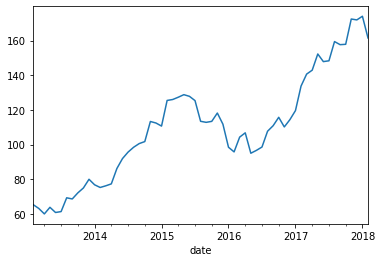

In [23]:
# M = month

d['close'].resample('M').mean().plot()

In [24]:
# mean close price for each and every year

d['close'].resample('Y').mean()

date
2013-12-31     67.237839
2014-12-31     92.264531
2015-12-31    120.039861
2016-12-31    104.604008
2017-12-31    150.585080
2018-12-31    171.594231
Freq: A-DEC, Name: close, dtype: float64

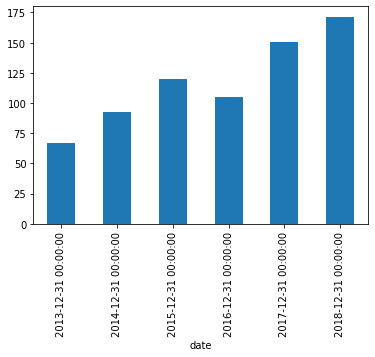

In [25]:
d['close'].resample('Y').mean().plot(kind='bar')

## Multivariate Analysis

In [ ]:
#use all tech co data

appl = pd.read_csv('/content/drive/MyDrive/Project DS/Data Analytics Real World Project -Python/2-Time Series Data Analysis/individual_stocks_5yr/AAPL_data.csv')
appl.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL


In [ ]:
amzn = pd.read_csv('/content/drive/MyDrive/Project DS/Data Analytics Real World Project -Python/2-Time Series Data Analysis/individual_stocks_5yr/AMZN_data.csv')
amzn.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,261.40,265.25,260.555,261.95,3879078,AMZN
1,2013-02-11,263.20,263.25,256.600,257.21,3403403,AMZN
2,2013-02-12,259.19,260.16,257.000,258.70,2938660,AMZN
3,2013-02-13,261.53,269.96,260.300,269.47,5292996,AMZN
4,2013-02-14,267.37,270.65,265.400,269.24,3462780,AMZN


In [ ]:
msft = pd.read_csv('/content/drive/MyDrive/Project DS/Data Analytics Real World Project -Python/2-Time Series Data Analysis/individual_stocks_5yr/MSFT_data.csv')
msft.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,27.35,27.71,27.31,27.55,33318306,MSFT
1,2013-02-11,27.65,27.92,27.50,27.86,32247549,MSFT
2,2013-02-12,27.88,28.00,27.75,27.88,35990829,MSFT
3,2013-02-13,27.93,28.11,27.88,28.03,41715530,MSFT
4,2013-02-14,27.92,28.06,27.87,28.04,32663174,MSFT


In [ ]:
goog = pd.read_csv('/content/drive/MyDrive/Project DS/Data Analytics Real World Project -Python/2-Time Series Data Analysis/individual_stocks_5yr/GOOG_data.csv')
goog.head()

,date,open,high,low,close,volume,Name
0,2014-03-27,568.000,568.00,552.92,558.46,13052,GOOG
1,2014-03-28,561.200,566.43,558.67,559.99,41003,GOOG
2,2014-03-31,566.890,567.00,556.93,556.97,10772,GOOG
3,2014-04-01,558.710,568.45,558.71,567.16,7932,GOOG
4,2014-04-02,565.106,604.83,562.19,567.00,146697,GOOG


In [ ]:
close = pd.DataFrame()

In [ ]:
close['appl'] = appl['close']
close['amzn'] = amzn['close']
close['msft'] = msft['close']
close['goog'] = goog['close']

In [ ]:
close.head()

,appl,amzn,msft,goog
0,67.8542,261.95,27.55,558.46
1,68.5614,257.21,27.86,559.99
2,66.8428,258.70,27.88,556.97
3,66.7156,269.47,28.03,567.16
4,66.6556,269.24,28.04,567.00


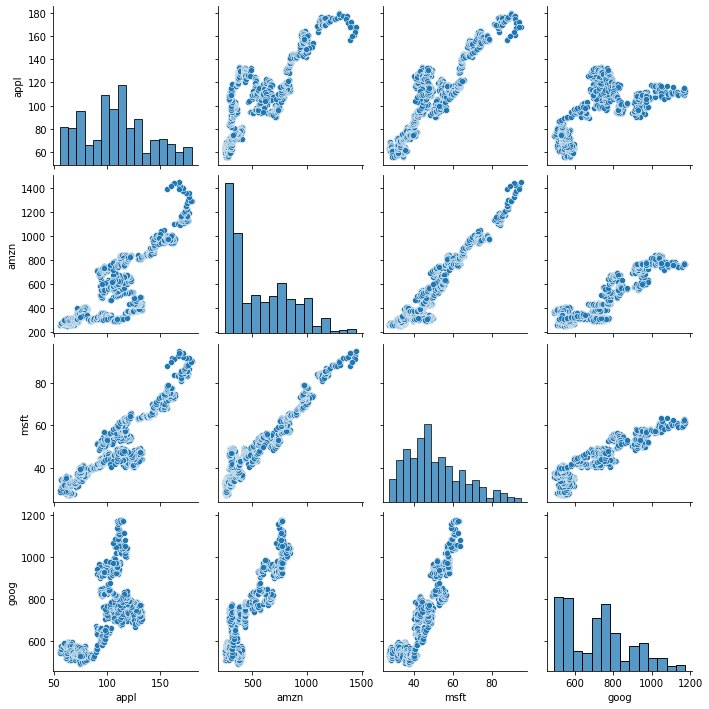

In [ ]:
import seaborn as sns

sns.pairplot(data=close)

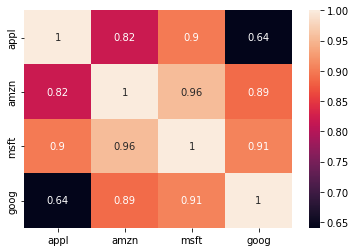

In [ ]:
sns.heatmap(close.corr(), annot=True)

## Value at Risk Analysis

In [ ]:
appl.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL


In [ ]:
dc = pd.DataFrame()

In [ ]:
dc['appl_change'] = ((appl['close'] - appl['open'])/appl['close'])*100
dc['amzn_change'] = ((amzn['close'] - amzn['open'])/amzn['close'])*100
dc['msft_change'] = ((msft['close'] - msft['open'])/msft['close'])*100
dc['goog_change'] = ((goog['close'] - goog['open'])/goog['close'])*100

In [ ]:
dc.head()

,appl_change,amzn_change,msft_change,goog_change
0,0.206325,0.209964,0.725953,-1.708269
1,0.714688,-2.328836,0.753769,-0.216075
2,-2.481344,-0.189409,0.000000,-1.781065
3,-0.042869,2.946525,0.356761,1.489879
4,0.443624,0.694548,0.427960,0.334039


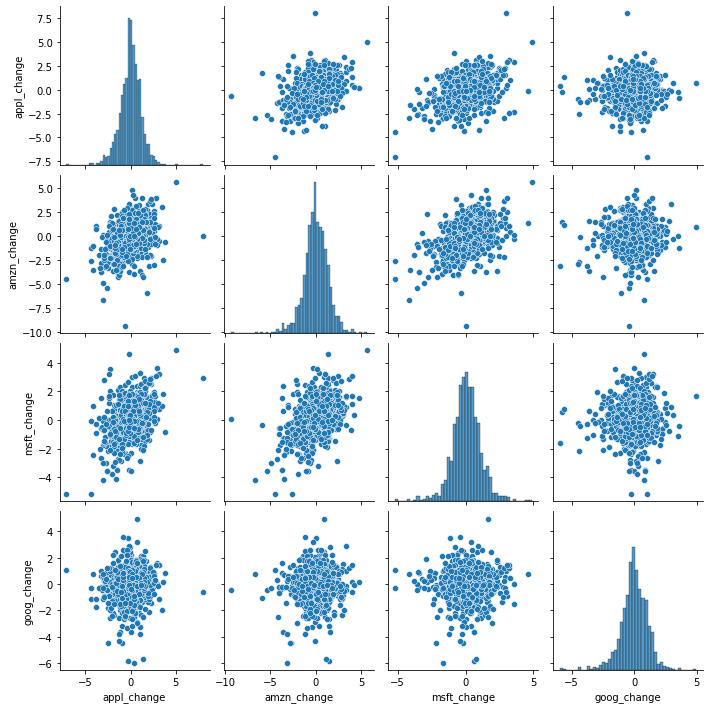

In [ ]:
sns.pairplot(data=dc)

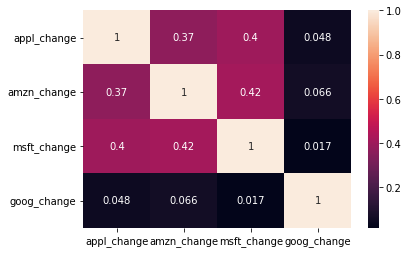

In [ ]:
sns.heatmap(dc.corr(), annot=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



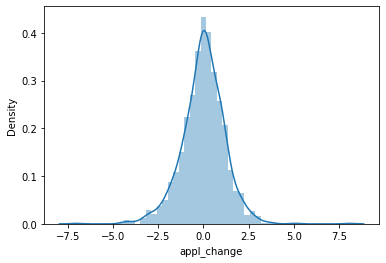

In [ ]:
sns.distplot(dc['appl_change']) #normal distibution

In [ ]:
dc['appl_change'].std()

# 68% of entire data

1.1871377131421237

In [ ]:
dc['appl_change'].std()*2

# 95% of entire data (normal distribution)

2.3742754262842474

In [ ]:
dc['appl_change'].std()*3

# 99.7% of entire data >>> 99.7% chance that our daily return will lay in range between -3.5 and 3.5

3.561413139426371

In [ ]:
dc['appl_change'].quantile(0.1)

# 90% of the time my worst daily lost will not exceed -1.4

-1.4246644227944307

In [ ]:
#daily return in percentage

dc.describe().T

,count,mean,std,min,25%,50%,75%,max
appl_change,1259.0,-0.000215,1.187138,-7.104299,-0.658021,0.042230,0.715427,8.000388
amzn_change,1259.0,-0.000398,1.358679,-9.363077,-0.738341,-0.002623,0.852568,5.640265
msft_change,1259.0,0.076404,1.059260,-5.177618,-0.509241,0.061069,0.703264,4.861491
goog_change,975.0,-0.012495,1.092560,-5.952266,-0.551963,0.024951,0.672649,4.943550
